In [2]:
import numpy as np 
import pandas as pd

In [3]:
data = pd.read_csv('Churn_Modelling.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
data.drop(columns = ['RowNumber','CustomerId','Surname'],inplace=True)

In [6]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
data['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [8]:
data['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [9]:
data = pd.get_dummies(data,columns=['Geography','Gender'],drop_first=True)

In [10]:
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [11]:
X = data.drop(columns=['Exited'])
y = data['Exited']

In [12]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,True,False,True


In [13]:
X.shape

(10000, 11)

In [14]:
y.shape

(10000,)

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=13)

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [19]:
model = Sequential()

model.add(Dense(11,activation='sigmoid',input_dim=11))
model.add(Dense(11,activation='sigmoid'))
model.add(Dense(11,activation='sigmoid'))
model.add(Dense(1,activation='sigmoid'))

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 11)                132       
                                                                 
 dense_1 (Dense)             (None, 11)                132       
                                                                 
 dense_2 (Dense)             (None, 11)                132       
                                                                 
 dense_3 (Dense)             (None, 1)                 12        
                                                                 
Total params: 408 (1.59 KB)
Trainable params: 408 (1.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [21]:

early_stopping = EarlyStopping(
    monitor='val_loss',   
    patience=10,            
    restore_best_weights=True  
)

model_checkpoint = ModelCheckpoint(
    'best_model.h5',       
    monitor='val_loss',     
    save_best_only=True     
)

model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train,batch_size=50,epochs=500,verbose=1,validation_split=0.2,callbacks=[early_stopping, model_checkpoint]
)



Epoch 1/500


128/128 [==============================] - 1s 2ms/step - loss: 0.6598 - accuracy: 0.5977 - val_loss: 0.5410 - val_accuracy: 0.7962
Epoch 2/500
109/128 [========================>.....] - ETA: 0s - loss: 0.5174 - accuracy: 0.7954

c:\Users\ashut\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


128/128 [==============================] - 0s 1ms/step - loss: 0.5150 - accuracy: 0.7959 - val_loss: 0.5032 - val_accuracy: 0.7962
Epoch 3/500
128/128 [==============================] - 0s 1ms/step - loss: 0.5016 - accuracy: 0.7959 - val_loss: 0.4985 - val_accuracy: 0.7962
Epoch 4/500
128/128 [==============================] - 0s 2ms/step - loss: 0.4967 - accuracy: 0.7959 - val_loss: 0.4915 - val_accuracy: 0.7962
Epoch 5/500
128/128 [==============================] - 0s 2ms/step - loss: 0.4880 - accuracy: 0.7959 - val_loss: 0.4793 - val_accuracy: 0.7962
Epoch 6/500
128/128 [==============================] - 0s 1ms/step - loss: 0.4743 - accuracy: 0.7959 - val_loss: 0.4627 - val_accuracy: 0.7962
Epoch 7/500
128/128 [==============================] - 0s 2ms/step - loss: 0.4579 - accuracy: 0.7959 - val_loss: 0.4456 - val_accuracy: 0.7962
Epoch 8/500
128/128 [==============================] - 0s 2ms/step - loss: 0.4434 - accuracy: 0.7959 - val_loss: 0.4337 - val_accuracy: 0.7962
Epoch 9/500

In [22]:
y_pred = model.predict(X_test)
y_test.shape


63/63 [==============================] - 0s 1ms/step


(2000,)

In [23]:
y_pred = np.where(y_pred>=0.5,1,0)

In [28]:
from sklearn.metrics import accuracy_score
accuracy_score = accuracy_score(y_test,y_pred)
print(f"The accuracy of the model is {accuracy_score*100}%")

The accuracy of the model is 86.65%


In [25]:
import matplotlib.pyplot as plt

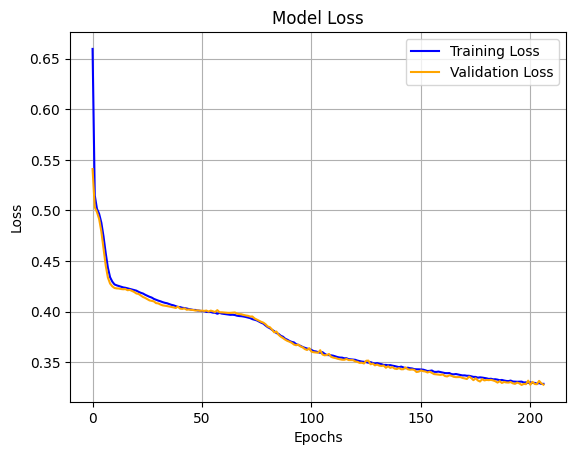

In [26]:
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right') 
plt.grid(True) 
plt.show()

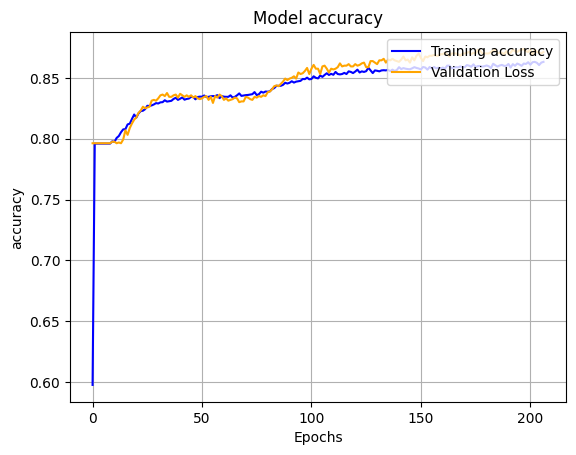

In [27]:
plt.plot(history.history['accuracy'], label='Training accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Loss', color='orange')
plt.title('Model accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend(loc='upper right') 
plt.grid(True) 
plt.show()